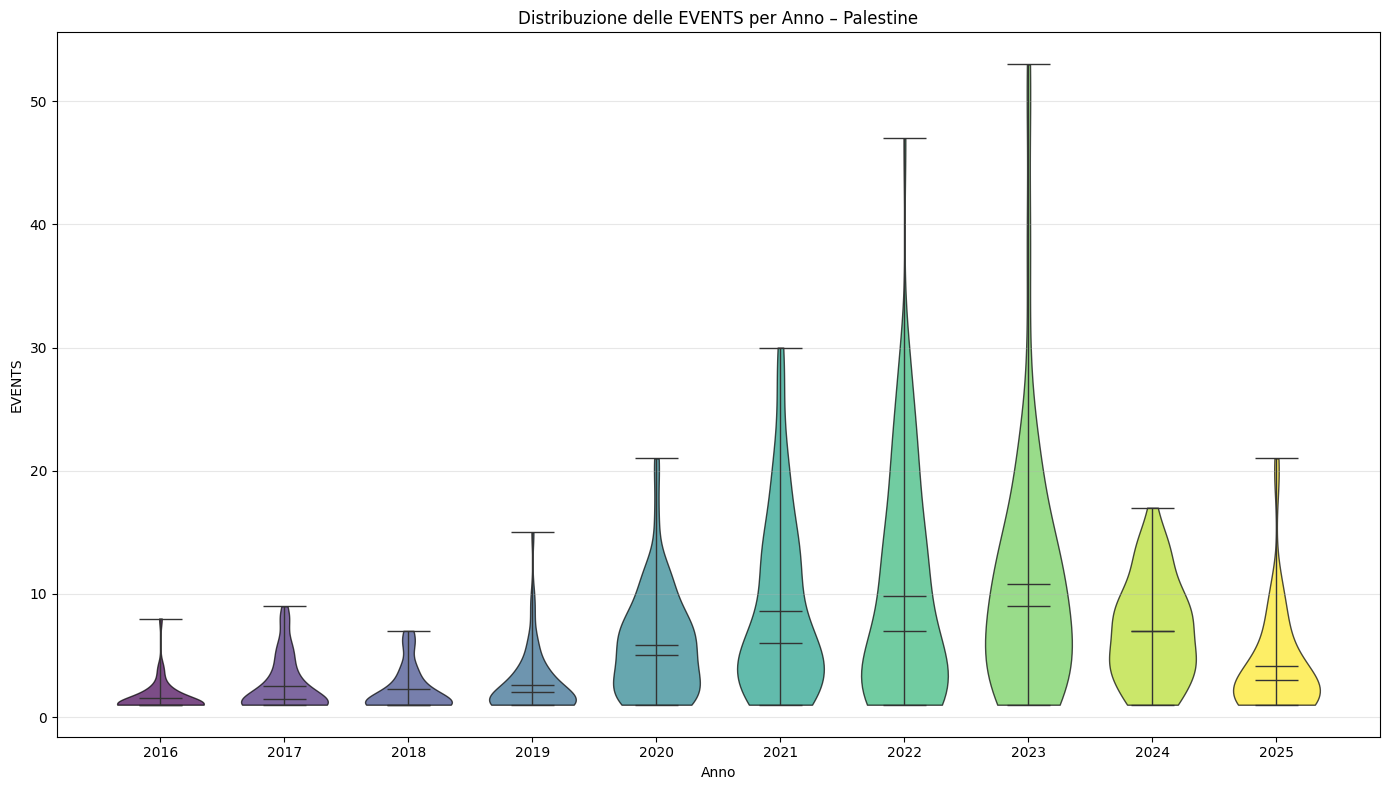

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Leggi il file CSV e carica in un DataFrame
df = pd.read_csv('../datasets/mea_aggregated_data.csv', delimiter=',')

# Filtra Palestine (non altero df originale in modo distruttivo)
df_pal = df[df['COUNTRY'] == 'Palestine'].copy()


#df = df[df['YEAR'] == 2024]
df_pal = df_pal[df_pal["SUB_EVENT_TYPE"] == "Peaceful protest"]
#df_pal = df_pal[df_pal["SUB_EVENT_TYPE"] == "Violent demonstration"]



# Converte EVENTS a numerico
df_pal['EVENTS'] = pd.to_numeric(df_pal['EVENTS'], errors='coerce')
df_pal = df_pal.dropna(subset=['EVENTS','YEAR'])


if df_pal.empty:
    print('Nessun dato per Palestine.')
else:
    # Ordina gli anni
    anni = sorted(df_pal['YEAR'].unique())
    data_by_year = []
    positions = []
    for i, year in enumerate(anni, start=1):
        vals = df_pal.loc[df_pal['YEAR'] == year, 'EVENTS'].values
        if len(vals) == 0:
            continue
        positions.append(i)
        data_by_year.append(vals)

    if not data_by_year:
        print('Nessun dato con EVENTS > 0 per gli anni disponibili.')
    else:
        fig, ax = plt.subplots(figsize=(14, 8))
        parts = ax.violinplot(data_by_year, positions=positions, widths=0.7,
                              showmeans=True, showmedians=True, showextrema=True)

        # Colori graduali per anno
        cmap = plt.cm.viridis
        for idx, body in enumerate(parts['bodies']):
            color = cmap(idx / max(1, len(parts['bodies']) - 1))
            body.set_facecolor(color)
            body.set_edgecolor('black')
            body.set_alpha(0.7)

        # Stile mediane / means se presenti
        for k in ['cmedians','cmeans','cbars','cmins','cmaxes']:
            if k in parts:
                parts[k].set_color('#333333')
                parts[k].set_linewidth(1)

        ax.set_xticks(positions)
        ax.set_xticklabels([str(a) for a in anni], rotation=0)
        ax.set_xlabel('Anno')
        ax.set_ylabel('EVENTS')
        ax.set_title('Distribuzione delle EVENTS per Anno – Palestine')
        ax.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()
        
df = df[["COUNTRY", "EVENT_TYPE", "SUB_EVENT_TYPE", "EVENTS", "FATALITIES", "YEAR"]]

df.to_csv("../datasets/mea_aggregated_data.csv", index=False)

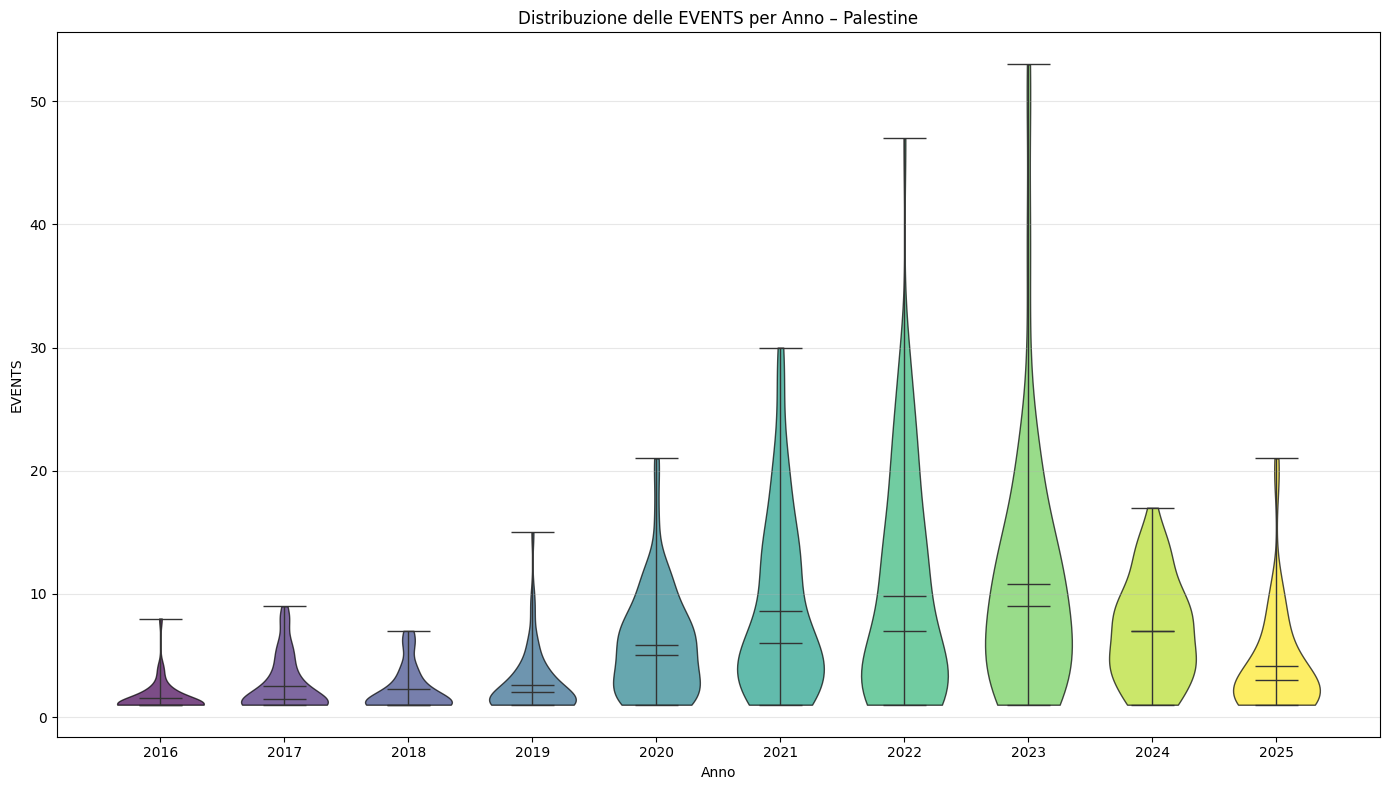

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Leggi il dataset ---
df = pd.read_csv('../raw_datasets/middle_east_aggregated_data.csv', sep=';', encoding='utf-8')

# --- Parsing della data (mesi italiani → inglesi) ---
mesi = {
    'gennaio': 'January', 'febbraio': 'February', 'marzo': 'March',
    'aprile': 'April', 'maggio': 'May', 'giugno': 'June',
    'luglio': 'July', 'agosto': 'August', 'settembre': 'September',
    'ottobre': 'October', 'novembre': 'November', 'dicembre': 'December'
}

# Converte i mesi italiani per estrarre l'anno
df['WEEK_EN'] = df['WEEK'].replace(mesi, regex=True)
df['WEEK_DATE'] = pd.to_datetime(df['WEEK_EN'], errors='coerce', format='%d-%B-%Y')
df['YEAR'] = df['WEEK_DATE'].dt.year

# Filtra Palestine (non altero df originale in modo distruttivo)
df_pal = df[df['COUNTRY'] == 'Palestine'].copy()


#df = df[df['YEAR'] == 2024]
df_pal = df_pal[df_pal["SUB_EVENT_TYPE"] == "Peaceful protest"]
#df_pal = df_pal[df_pal["SUB_EVENT_TYPE"] == "Violent demonstration"]



# Converte EVENTS a numerico
df_pal['EVENTS'] = pd.to_numeric(df_pal['EVENTS'], errors='coerce')
df_pal = df_pal.dropna(subset=['EVENTS','YEAR'])

if df_pal.empty:
    print('Nessun dato per Palestine.')
else:
    # Ordina gli anni
    anni = sorted(df_pal['YEAR'].unique())
    data_by_year = []
    positions = []
    for i, year in enumerate(anni, start=1):
        vals = df_pal.loc[df_pal['YEAR'] == year, 'EVENTS'].values
        if len(vals) == 0:
            continue
        positions.append(i)
        data_by_year.append(vals)

    if not data_by_year:
        print('Nessun dato con EVENTS > 0 per gli anni disponibili.')
    else:
        fig, ax = plt.subplots(figsize=(14, 8))
        parts = ax.violinplot(data_by_year, positions=positions, widths=0.7,
                              showmeans=True, showmedians=True, showextrema=True)

        # Colori graduali per anno
        cmap = plt.cm.viridis
        for idx, body in enumerate(parts['bodies']):
            color = cmap(idx / max(1, len(parts['bodies']) - 1))
            body.set_facecolor(color)
            body.set_edgecolor('black')
            body.set_alpha(0.7)

        # Stile mediane / means se presenti
        for k in ['cmedians','cmeans','cbars','cmins','cmaxes']:
            if k in parts:
                parts[k].set_color('#333333')
                parts[k].set_linewidth(1)

        ax.set_xticks(positions)
        ax.set_xticklabels([str(a) for a in anni], rotation=0)
        ax.set_xlabel('Anno')
        ax.set_ylabel('EVENTS')
        ax.set_title('Distribuzione delle EVENTS per Anno – Palestine')
        ax.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()

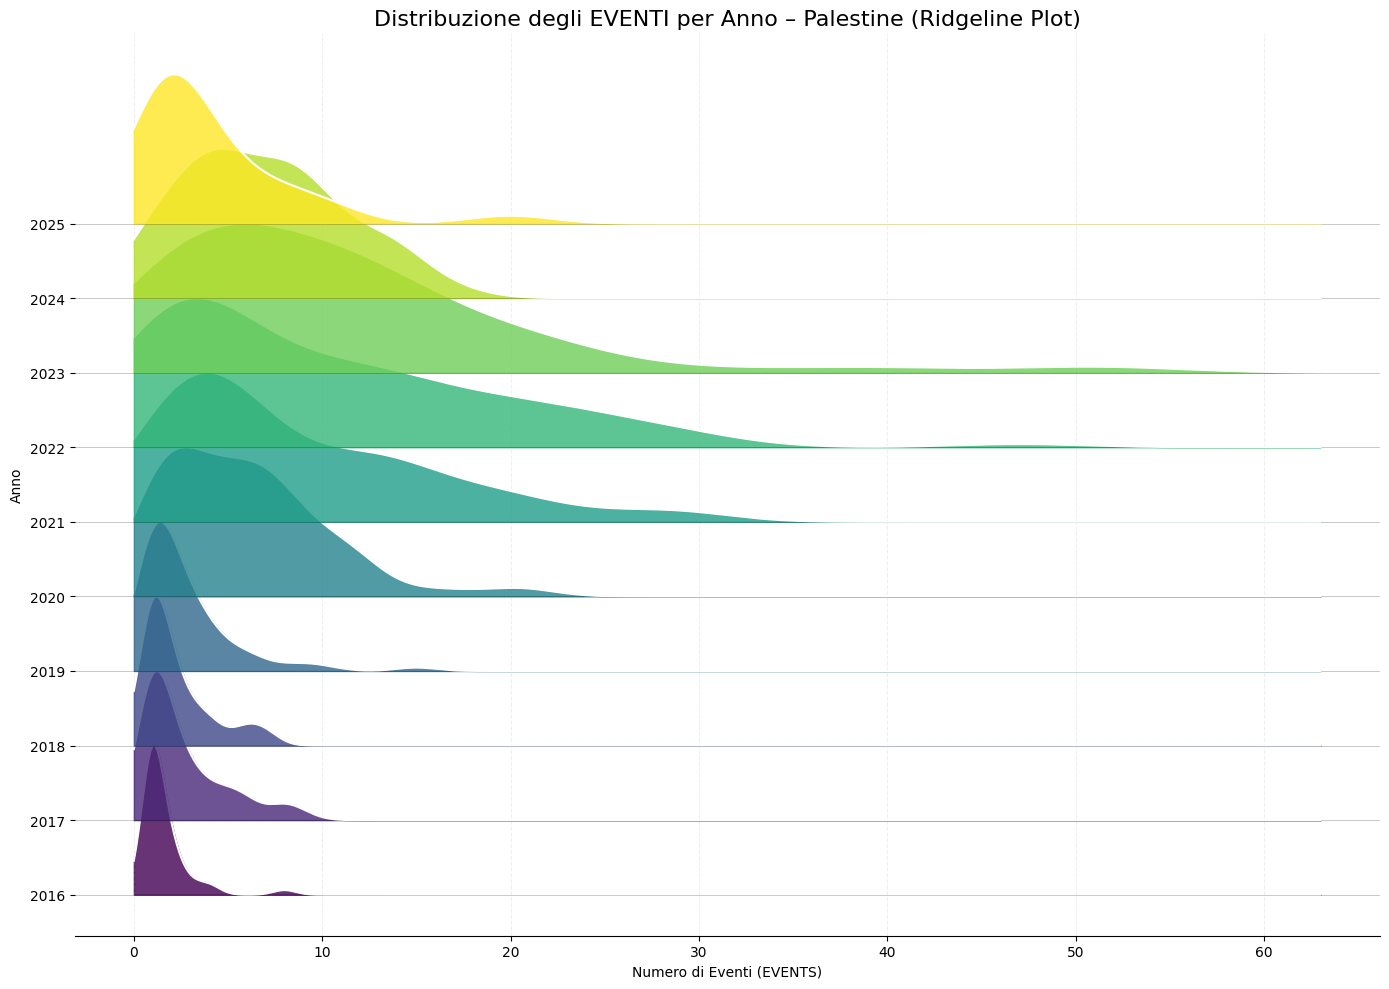

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Leggi il file CSV e carica in un DataFrame
try:
    df = pd.read_csv('../datasets/mea_aggregated_data.csv', delimiter=',')
except FileNotFoundError:
    # Modifica questo percorso se il file si trova altrove
    df = pd.read_csv('mea_aggregated_data.csv', delimiter=',')

# Filtra Palestine (copia per non modificare l'originale)
df_pal = df[df['COUNTRY'] == 'Palestine'].copy()

# Filtri opzionali (come nel tuo esempio)
df_pal = df_pal[df_pal["SUB_EVENT_TYPE"] == "Peaceful protest"]

# Converte EVENTS a numerico e rimuove NaN
df_pal['EVENTS'] = pd.to_numeric(df_pal['EVENTS'], errors='coerce')
df_pal = df_pal.dropna(subset=['EVENTS', 'YEAR'])

if df_pal.empty:
    print('Nessun dato per Palestine con i filtri correnti.')
else:
    anni = sorted(df_pal['YEAR'].unique())
    data_by_year = []
    for year in anni:
        vals = df_pal.loc[df_pal['YEAR'] == year, 'EVENTS'].values
        # KDE richiede almeno 2 punti dati diversi per funzionare bene,
        # ma gestiamo anche casi con pochi dati se necessario.
        if len(vals) > 1 and np.std(vals) > 0:
             data_by_year.append((year, vals))
        elif len(vals) > 0:
            # Fallback per anni con un solo valore o varianza zero: li teniamo ma potrebbero non avere una KDE bella
            data_by_year.append((year, vals))

    if not data_by_year:
        print('Dati insufficienti per generare il grafico.')
    else:
        # Creazione del Ridgeline Plot
        fig, ax = plt.subplots(figsize=(14, 10))

        # Trova i limiti globali per l'asse X per avere una scala comune
        all_vals = np.concatenate([d[1] for d in data_by_year])
        x_min, x_max = all_vals.min(), all_vals.max()
        # Estendi leggermente il range per estetica
        x_grid = np.linspace(max(0, x_min - 5), x_max + 10, 500)

        # Parametri estetici
        overlap = 0.5  # Quanto si sovrappongono i grafici (aggiusta a piacimento)
        cmap = plt.cm.viridis # Mappa colori

        yticks = []
        yticklabels = []

        # Itera sugli anni per creare ogni "cresta" (ridge)
        for i, (year, vals) in enumerate(data_by_year):
            # Calcola la densità (KDE)
            if len(vals) > 1 and np.std(vals) > 0:
                kde = gaussian_kde(vals, bw_method='scott')
                y_vals = kde(x_grid)
                # Normalizza l'altezza per rendere le creste comparabili visivamente
                y_vals = y_vals / y_vals.max()
            else:
                # Caso degenere: picco su un singolo valore
                y_vals = np.zeros_like(x_grid)
                idx_nearest = (np.abs(x_grid - vals[0])).argmin()
                y_vals[idx_nearest] = 1.0 # Impulso unitario approssimato

            # Definisci l'offset verticale per questo anno
            offset = i * overlap
            
            # Zorder: gli anni più recenti (in alto) coprono quelli precedenti, o viceversa.
            # Qui mettiamo i primi anni davanti (zorder più alto) se li disegniamo dal basso verso l'alto.
            # Solitamente si vuole che quello sopra copra quello sotto.
            # Se i aumenta verso l'alto, vogliamo zorder decrescente se vogliamo che "quello davanti" sia quello più in basso,
            # oppure zorder crescente se quello in alto deve coprire.
            # Proviamo a far coprire quelli più in alto (anni recenti).
            zorder = i + 1

            color = cmap(i / max(1, len(data_by_year) - 1))
            
            # Riempi l'area sotto la curva
            ax.fill_between(x_grid, y_vals + offset, offset, color=color, alpha=0.8, zorder=zorder)
            # Disegna la linea di contorno
            ax.plot(x_grid, y_vals + offset, color='white', linewidth=1.5, zorder=zorder + 0.1)
            # Opzionale: aggiungi una linea di base nera sottile
            ax.axhline(y=offset, color='black', linewidth=0.5, alpha=0.3, zorder=zorder)

            yticks.append(offset)
            yticklabels.append(str(int(year)))

        # Imposta assi ed etichette
        ax.set_yticks(yticks)
        ax.set_yticklabels(yticklabels)
        ax.set_xlabel('Numero di Eventi (EVENTS)')
        ax.set_ylabel('Anno')
        ax.set_title('Distribuzione degli EVENTI per Anno – Palestine (Ridgeline Plot)', fontsize=16)

        # Rimuovi i bordi del grafico per un look più pulito tipico dei ridgeline
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        
        # Griglia solo verticale se utile, o nessuna
        ax.grid(axis='x', alpha=0.2, linestyle='--')

        plt.tight_layout()
        plt.show()